<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/5_1DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data') #판다스 데이터 프레임으로 와인 데이터 셋 가져오기

In [39]:
wine.head()
#class = 0 레드 와인
#class = 1 화이트 와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


**전체 class에서 화이트와인(양성 클래스)를 골라내는 이진 분류 문제**

In [40]:
#info() 이용해서 각 열의 데이터 타입과 누락된 데이터 유무 확인
wine.info()
#만약 누락된 값이 있다면 버리거나 평균값(훈련 세트 기준)으로 채우고 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [41]:
#describe() 열에 대한 간략한 통계(mean, max/min, 분위수, 표준 편차 etc...)
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


alcohol, sugar, pH의 스케일이 달라서 표준화 필요

In [42]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [43]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42) #테스트 세트 비율 20%(기본 25%)

In [44]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [45]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

**로지스틱 회귀로 이진 분류**

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
#과소적합

0.7808350971714451
0.7776923076923077


In [47]:
print(lr.coef_, lr.intercept_) #학습한 가중치와 y절편

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


**로지스틱 모델에 대해서 혼공머신이 보고서를 작성하고 이사님께 설명을 드렸으나 이사님은 이 보고서를 이해하시 못하셨다...그래서 더 쉬운 방법으로 설명이 가능한 모델이 필요한 상황**

In [48]:
#결정 트리(decision tree)를 이용해서 와인 분류 진행
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42) #decision tree 알고리즘은 약간의 무작위성이 주입되어서 책 내용과 실습 결과가 같게 만들기 위해 random_state = 42 지정함. 실제로는 필요X
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#과대 적합

0.996921300750433
0.8592307692307692


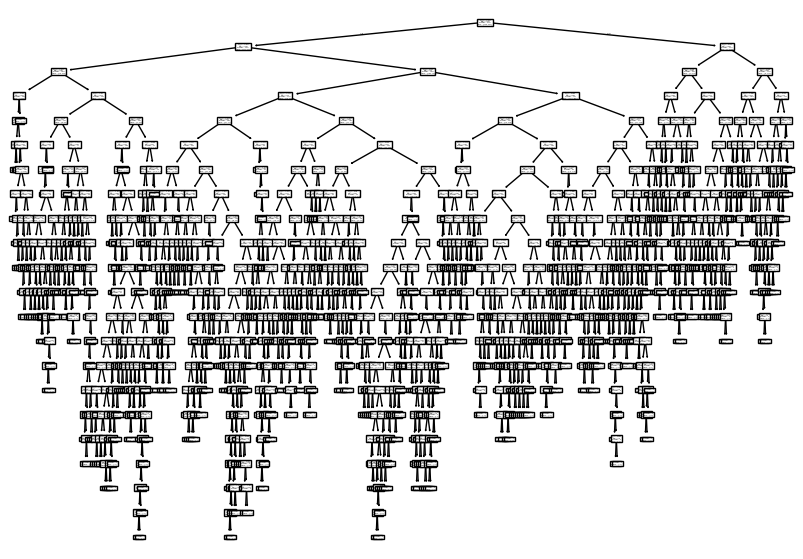

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10, 7))
plot_tree(dt) #결정 트리를 그림으로 출력(plot_tree()에 decision tree classifier 객체 전달)
plt.show()
#맨 위 노드가 루트 노드(root 뿌리)
#맨 아래 끝에 달린 노드가 리프 노드(leaf 나뭇잎)

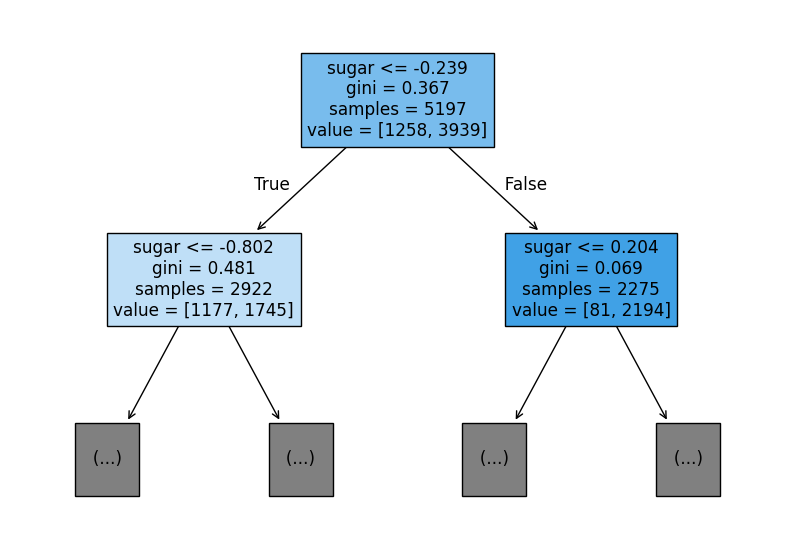

In [50]:
plt.figure(figsize = (10, 7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar' , 'ph']) #max_depth = 1로 트리 깊이 제한 걸어놓고 출력
#filled = Ture => 클래스에 맞게 노드의 색 칠하기
# feature_names = [] => 노드가 어떤 feature로 나뉘는지 확인
plt.show()
#깊이는 루트 노드 기준

# 노드
1. 테스트 조건(sugar)
2. 불순도(gini)
3. 총 샘플 수(samples
4. 클래스 별 샘플 수(value) => [음성 클래스 개수, 양성 클래스 개수)
- 테스트 조건을 만족하면 왼쪽으로, 만족 하지 않으면 오른쪽으로 간다.
- 어떤 클래스의 비율이 높아지면 점점 더 진한 색으로 표시한다.
- 이렇게 내려가다 리프 노드에서 가장 많은 클래스가 예측 클래스가 된다.



# 불순도
- 경정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킨다.
- 정보 이득(information gain): 부모와 자식 노드 사이의 불순도 차이
- 지니 불순도
  - 지니 불순도 = 1 - {(음성 클래스 비율)^2 + (양성 클래스 비율)^2}
- 엔트로피 불순도
  - -음성 클래스 비율 * log2(음성 클래스 비율) - 양서 클래스 비율 * log2(양성 클래스 비율)
- 정보 이득 계산법
  - 부모의 불순도 - (왼쪽 노드 샘플 수/부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수/부모의 샘플 수) * 오른쪽 노드 불순도

# 가지 치기
- 트리가 무작정 끝까지 자라나게 두면 훈련 세트에만 잘 맞는 일반화가 잘 안된 트리가 만들어짐
- 그래서 트리의 최대 깊이를 지정하여 가지치기를 함
- 최대 깊이를 지정하는 방법 말고도 여러가지 방법이 존재

In [51]:
dt = DecisionTreeClassifier(max_depth=3, random_state = 42) #max_depth 3으로 지정
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


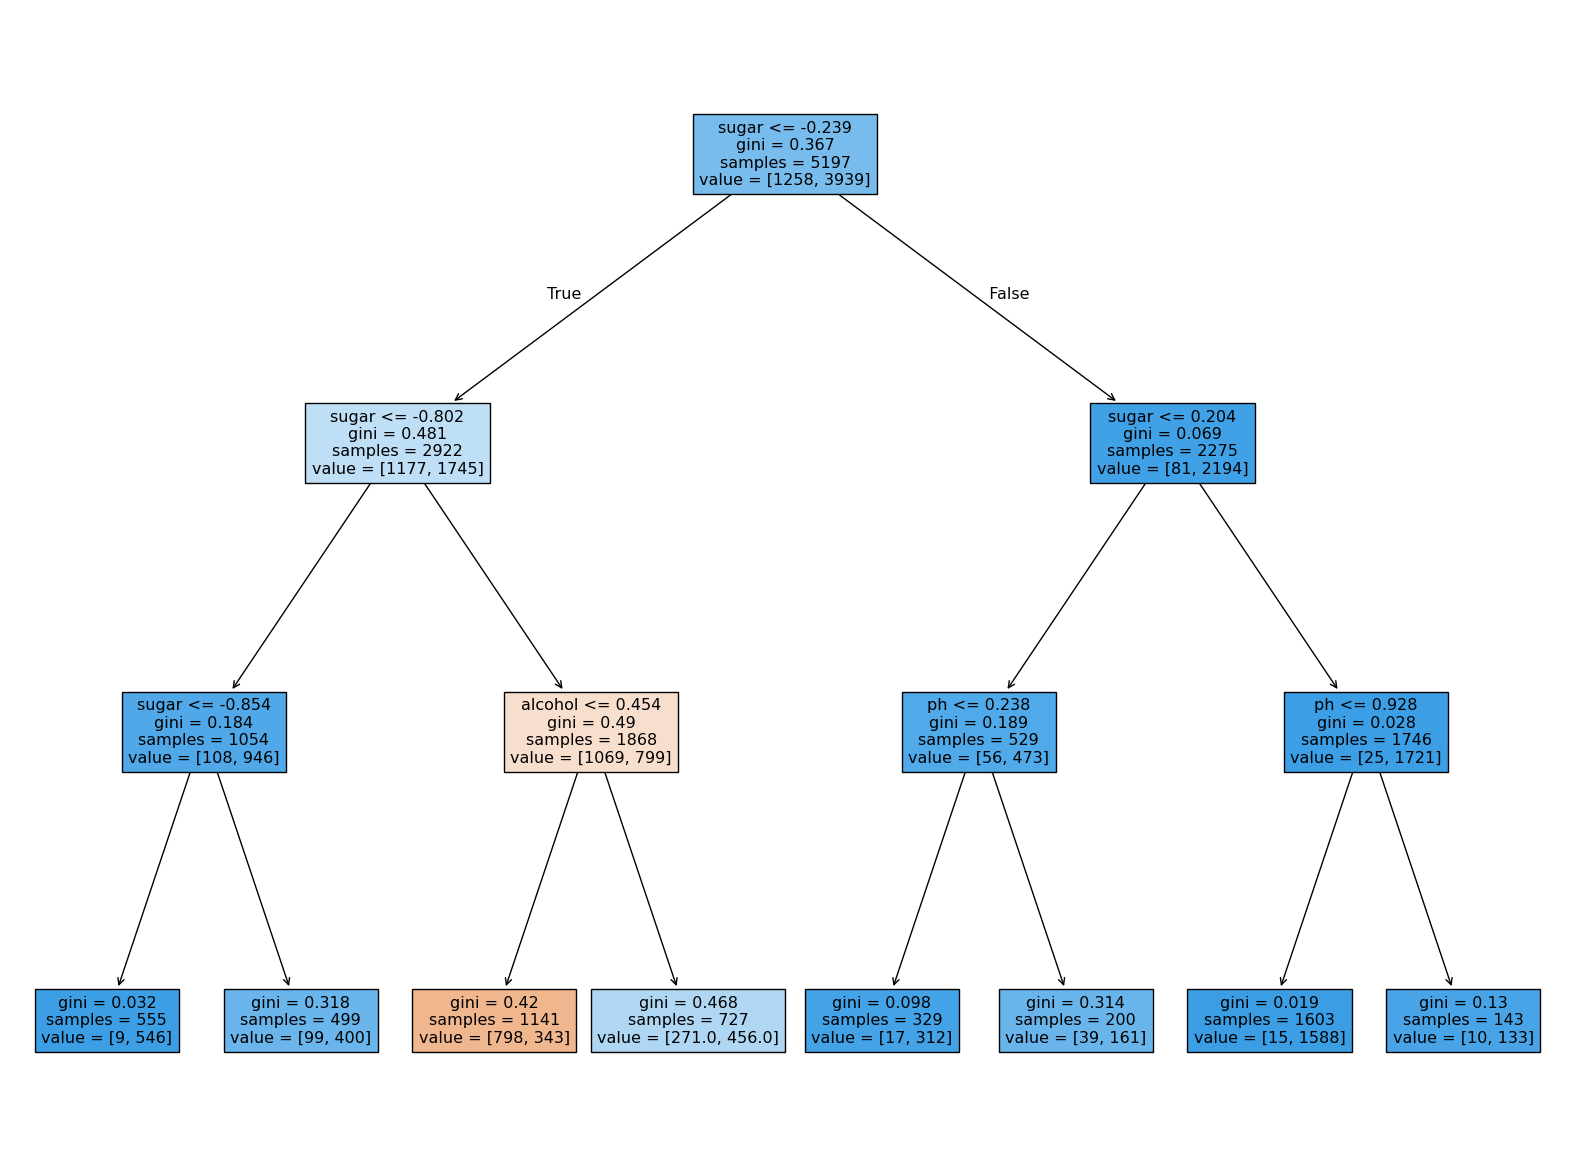

In [52]:
# 트리 해석
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'ph'])
plt.show()

**트리의 불순도는 class의 비율로 계산하기 때문에 feature 값의 스케일은 모델에 영향을 주지 않는다 => 스케일링을 할 필요가 없다!!**

In [53]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


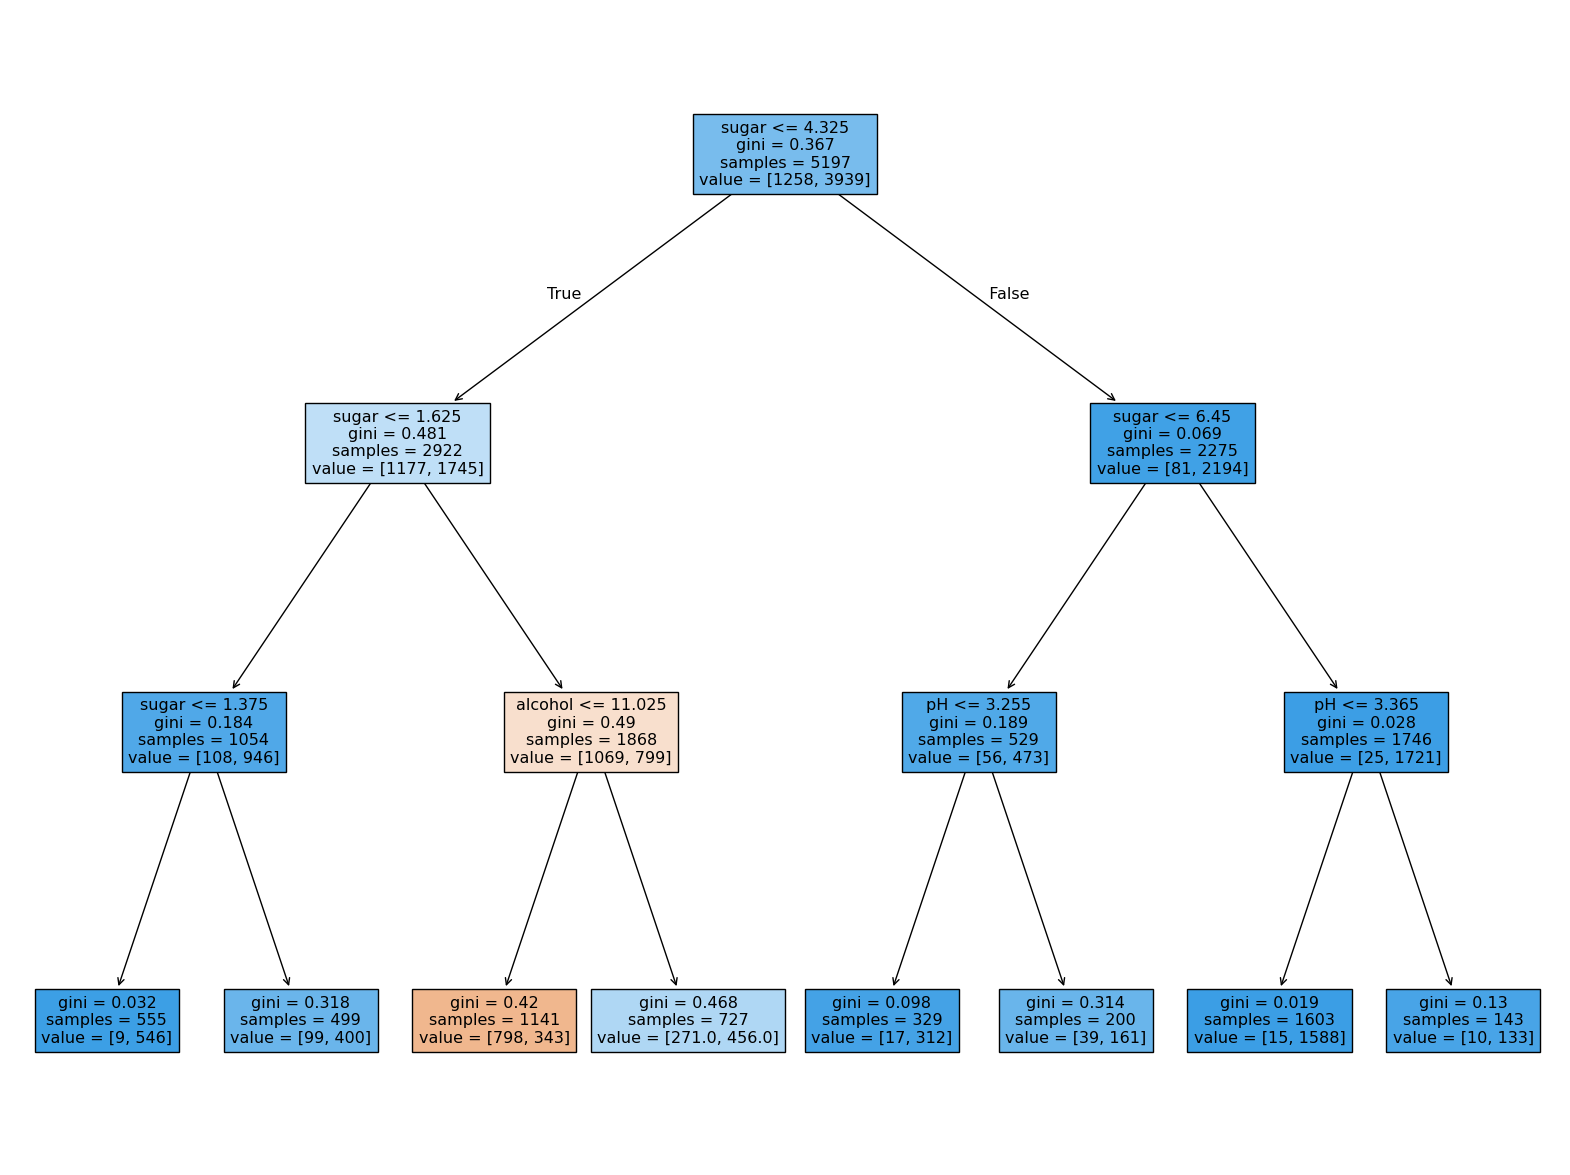

In [55]:
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [56]:
#특성 중요도(feature importance): 어떤 특서잉 가장 유용한지 나타냄
print(dt.feature_importances_)
# 당도가 굉장히 유용했구나!
# feature importance를 활용하면 결정 트리 모델을 feature selection에 활용 할 수 있겠구나!!

[0.12345626 0.86862934 0.0079144 ]


**feature importance를 활용하면 결정 트리 모델을 feature selection에 활용 할 수 있겠구나!!**

0.8874350586877044
0.8615384615384616


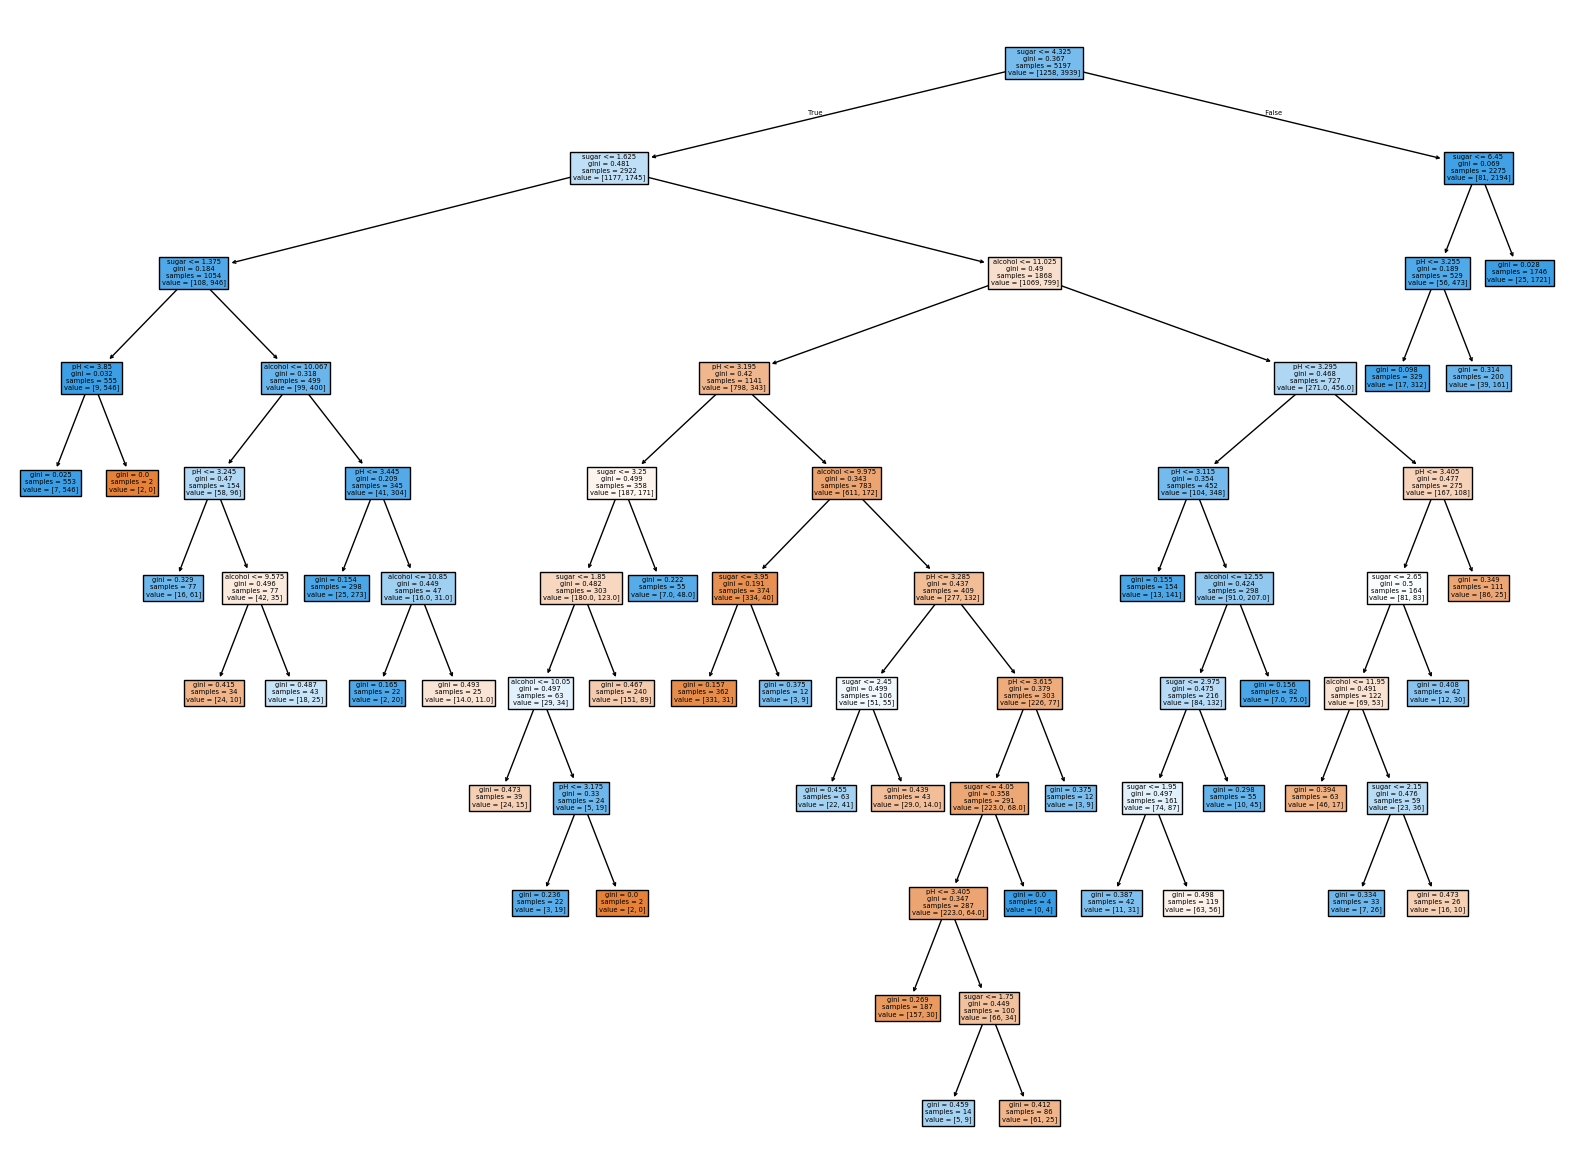

In [57]:
#확인 문제
#min_impurity_decrease = 0.0005를 사용한 가지치기
# information gain * (노드의 샘플 수)/(전체 샘플 수)가 0.0005보다 작을 경우 더이상 노드 분할 x
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()
#